In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "../code-previous")

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import WOSutilities as wosutil
import time
import os

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

import utils

path2rawdata = '/home/sree/Downloads/WOSsample'

In [4]:
# use this as set 1
impact_df_1 = utils.load_impact_data(name = 'impact1', 
                                   path2rawdata = path2rawdata,
                                   year_list = None, 
                                   columns = ['ArticleID', 'PubYear', 'c5'],
                                   dropna = ['ArticleID', 'PubYear'], 
                                   duplicate_subset = None,
                                   isindict = {},
                                   verbose = 500)

500
1000
1500
2000
2500
3000
Final DF Shape (1309330, 3)


In [5]:
# use this as set 2 - from 1950 until 2000
impact_df_2 = utils.load_impact_data(name = 'impact2', 
                                   path2rawdata = path2rawdata,
                                   year_list = None, 
                                   columns = ['ArticleID', 'PubYear', 'c5'],
                                   dropna = ['ArticleID', 'PubYear'], 
                                   duplicate_subset = None,
                                   isindict = {},
                                   verbose = 500)

500
1000
Final DF Shape (1490195, 3)


In [6]:
# combine all the dataframes read
impact_df = pd.concat([impact_df_1, impact_df_2], ignore_index=True)

In [7]:
impact_df['PubYear'].unique()

array([1938, 1917, 1920, 1939, 1912, 1934, 1935, 1907, 1921, 1936, 1913,
       1901, 1918, 1931, 1937, 1923, 1919, 1916, 1925, 1929, 1914, 1943,
       1941, 1904, 1926, 1940, 1903, 1900, 1911, 1905, 1910, 1930, 1922,
       1915, 1928, 1906, 1944, 1902, 1932, 1909, 1908, 1924, 1927, 1942,
       1933, 1955, 1958, 1949, 1951, 1952, 1947, 1959, 1948, 1953, 1956,
       1946, 1954, 1945, 1950, 1957])

In [8]:
# Using c5 - citiations the paper has created in the 5 years following its publication

impact_df['c5'].unique()

array([  0.,   8.,   1.,   3.,   2.,   6.,   4.,  24.,  16.,   9.,   5.,
        11.,  15.,  52.,   7.,  12.,  21.,  10.,  22.,  39.,  35.,  14.,
        26.,  17.,  13.,  18.,  19.,  23.,  42.,  50.,  20.,  29.,  47.,
        55.,  30.,  44.,  87.,  27.,  25.,  36.,  33.,  28.,  31.,  34.,
        32.,  72., 108.,  43.,  38.,  57.,  69., 116.,  41.,  66.,  49.,
        40.,  58.,  56.,  90.,  78.,  75.,  65., 110.,  67.,  71.,  92.,
        51.,  37.,  63.,  53.,  59., 203.,  46.,  45.,  85.,  48.,  74.,
        86.,  62.,  68., 100.,  54.,  73.,  82.,  76.,  61.,  98.,  77.,
        60.,  83.,  88., 124.,  80.,  64., 112.,  89., 135., 119.,  70.,
       155., 134., 184., 171., 148., 182., 199.,  99., 138., 217., 111.,
        84., 101., 236.,  94., 125., 118.,  95., 200., 113., 104.,  81.,
       128., 106., 127., 174.,  96.,  79., 164., 122., 102.,  97., 140.,
       103., 178., 212., 373., 196., 159., 152., 180., 204., 130., 107.,
       126.,  91., 109., 117., 115., 222., 467., 14

In [9]:
# correction - adding 1 to all the citation counts (for easiness of log scale calculations)
# and taking the log scale on it
import numpy as np

impact_df['log_c5'] = impact_df['c5'].apply(lambda x: np.log(x+1))

In [10]:
impact_df.head()

,ArticleID,PubYear,c5,log_c5
0,000204410000006,1938,0.0,0.000000
1,000186939300004,1938,8.0,2.197225
2,000201775600013,1938,1.0,0.693147
3,000204917100015,1938,0.0,0.000000
4,000200186900005,1938,3.0,1.386294


In [11]:
# we need to load articles and categories

article_df = wosutil.load_wos_data(name = 'article', 
                                   path2rawdata = path2rawdata,
                                   year_list = None, 
                                   columns = ['ArticleID', 'PubYear', 'Doctypes', 'Title'], 
                                   dropna = ['ArticleID', 'PubYear'], 
                                   duplicate_subset = ['ArticleID'],
                                   isindict = {'Doctypes':np.sort(['Article','Letter','Review','Note'])}, 
                                   verbose = 50)

# select all categories for all the aricles published
category_list = np.array(['Physics, Applied'])  

category_df = wosutil.load_wos_data(name = 'category', 
                                    path2rawdata = path2rawdata,
                                    year_list = None,
                                    columns = None, 
                                    dropna = ['ArticleID'], 
                                    duplicate_subset = None,
                                    isindict = {'Label':category_list},
                                    verbose = 100)

Final DF Shape (1092061, 4)
Final DF Shape (10559, 3)


In [12]:
# joining citations with articles and categories

# joining the dataframes
data = None
data = article_df.merge(category_df, 
                        how = 'left',
                        on = 'ArticleID')

data = data.merge(impact_df,
                  how = 'left',
                  on = 'ArticleID')

In [13]:
data.head()

,ArticleID,PubYear_x,Doctypes,Title,Type,Label,PubYear_y,c5,log_c5
0,000188724900460,1922,Letter,Why is septic aural discharge so common ?,NaN,NaN,1922,0.0,0.000000
1,000200401000287,1934,Letter,"The GP, the schoolmaster, and the specialist",NaN,NaN,1934,0.0,0.000000
2,000202753700002,1908,Article,The determination of vapour pressures of solut...,NaN,NaN,1908,0.0,0.000000
3,000202408700045,1944,Article,Relationship of penicillin to sulfonamide action,NaN,NaN,1944,21.0,3.091042
4,000188445600529,1940,Article,Polymerization of beta-methallyl alcohol and i...,NaN,NaN,1940,1.0,0.693147


In [14]:
data = data.drop_duplicates()
len(data)

1092061

In [29]:
data.to_pickle("/home/sree/code/science-of-genius-title-impact/serialized/all_data_sample.pql")

In [15]:
# clean up puctuations from titles
from unicodedata import category

data['title_without_punctuations'] = data['Title'].apply(lambda x: ''.join(ch for ch in x if category(ch)[0] != 'P'))

In [16]:
data.head()

,ArticleID,PubYear_x,Doctypes,Title,Type,Label,PubYear_y,c5,log_c5,title_without_punctuations
0,000188724900460,1922,Letter,Why is septic aural discharge so common ?,NaN,NaN,1922,0.0,0.000000,Why is septic aural discharge so common
1,000200401000287,1934,Letter,"The GP, the schoolmaster, and the specialist",NaN,NaN,1934,0.0,0.000000,The GP the schoolmaster and the specialist
2,000202753700002,1908,Article,The determination of vapour pressures of solut...,NaN,NaN,1908,0.0,0.000000,The determination of vapour pressures of solut...
3,000202408700045,1944,Article,Relationship of penicillin to sulfonamide action,NaN,NaN,1944,21.0,3.091042,Relationship of penicillin to sulfonamide action
4,000188445600529,1940,Article,Polymerization of beta-methallyl alcohol and i...,NaN,NaN,1940,1.0,0.693147,Polymerization of betamethallyl alcohol and it...


In [17]:
#count of words in the title

data["words_in_title"] = data["title_without_punctuations"].apply(lambda x: len(x.split()))

# average number of words in paper titles of a year
grouped_df_titlecount = data.groupby('PubYear_y', as_index=False)['words_in_title'].mean()
grouped_df_avgcit = data.groupby('PubYear_y', as_index=False)['log_c5'].mean()

In [18]:
grouped_dfs = grouped_df_titlecount.merge(grouped_df_avgcit,
                                          how = 'left',
                                          on = 'PubYear_y')
grouped_dfs.head()

,PubYear_y,words_in_title,log_c5
0,1900,8.492403,0.044886
1,1901,8.603651,0.041285
2,1902,8.788330,0.046863
3,1903,8.756500,0.058912
4,1904,8.726779,0.064107


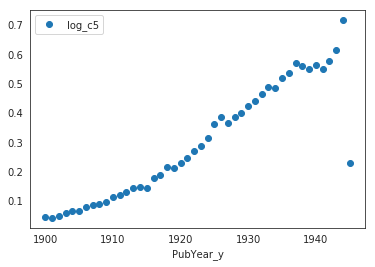

In [19]:
# variation of c5 counts with year
grouped_dfs.plot(x='PubYear_y', y='log_c5', style='o')

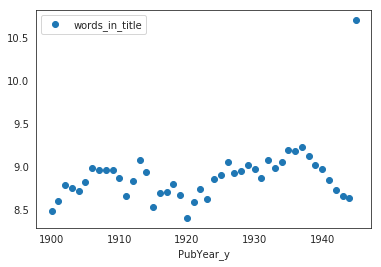

In [20]:
#variation of words_in_title with year
grouped_dfs.plot(x='PubYear_y', y='words_in_title', style='o')